# ĐỒ ÁN CUỐI KỲ (NMKHDL - CQ2018/2)
### Giảng viên hướng dẫn: Thầy Trần Trung Kiên
### Trợ giảng: Thầy Hoàng Xuân Trường

__Thông tin nhóm__: 

* STT: 46

* Họ và tên sinh viên: Nguyễn Hữu Huân - MSSV: 1712466

* Họ và tên sinh viên: Đặng Hữu Thắng - MSSV: 18120555

---

## Import

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

# Để show hết dòng, cột khi hiển thị
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Để ẩn đi warnings :(
import warnings
warnings.filterwarnings('ignore')

----

## Thu thập dữ liệu

Dữ liệu mà nhóm em dùng cho đồ án cuối kỳ được tự thu thập từ trang [Booking.com](https://booking.com) - Trang web về du lịch cung cấp dịch vụ đặt chỗ, đặt phòng khách sạn ở trực tuyến trên toàn thế giới. Dữ liệu nhóm em thu thập chứa thông tin về chỗ ở (bao gồm cả khách sạn, nhà nghỉ, homestay,..) ở 4 địa điểm du lịch của Việt Nam: Hà Nội, Đà Nẵng, Đà Lạt, Thành phố Hồ Chí Minh.

Dữ liệu trên trang web này được phép thu thập, được mô tả cụ thể thông qua file robots.txt.

Phần source code cho quá trình cào dữ liệu về  được lưu ở file notebook [crawl_data.ipynb](https://github.com/huuthang2509/DoAn-CK---NMKHDL/blob/master/notebooks/crawl_data.ipynb).

Toàn bộ dữ liệu thô sau khi cào về lưu ở file: "full_data.csv".

---

## Khám phá dữ liệu (đủ để xác định câu hỏi) + tiền xử lý 

Do file "full_data.csv" là tất cả dữ liệu mà nhóm em tự cào được, nên nhóm sẽ cần khám phá một ít trên dữ liệu để đưa ra câu hỏi cần trả lời, sau đó tiến hành kiểm tra, làm sạch một vài vấn đề cơ bản (vì tất cả hoàn toàn là dữ liệu thô) và ngay lập tức tách tập validation và test ra khỏi dữ liệu. Như đã được thầy đề cập ở BT03, điều này để tránh hiểu quá sâu dữ liệu, làm mất đi tính khách quan khi đánh giá kết quả.

In [2]:
data_df =pd.read_csv('../datasets/full_data.csv')
data_df.sample(n=10)

,City,Diện tích,Đồ vệ sinh cá nhân miễn phí,Vòi sen,Áo choàng tắm,Két an toàn,Nhà vệ sinh,Khăn tắm,Bàn làm việc,Khu vực tiếp khách,TV,Dép,Tủ lạnh,Điện thoại,Hệ thống sưởi,Máy sấy tóc,Sàn trải thảm,Ấm đun nước điện,Truyền hình cáp,Dịch vụ báo thức,Tủ hoặc phòng để quần áo,Giá treo quần áo,Nhìn ra thành phố,Bồn tắm,Điều hòa không khí,Phòng tắm riêng,TV màn hình phẳng,Hệ thống cách âm,Minibar,WiFi miễn phí,Ghế sofa,Máy fax,Phòng thay quần áo,Nhìn ra hồ bơi,Bếp,Máy giặt,Bồn tắm hoặc Vòi sen,Đồng hồ báo thức,Bàn ăn,Bồn tắm spa,Ổ điện gần giường,Toilet phụ,Dịch vụ báo thức,Giấy vệ sinh,Phòng tắm riêng trong phòng,Tiện nghi ủi,Giường cực dài (> 2 mét),Bếp nhỏ,Khu vực phòng ăn,Tầm nhìn ra khung cảnh,Truyền hình vệ tinh,Bàn ủi,Ban công,Nhìn ra sông,Quyền sử dụng Executive Lounge,Sàn lát gỗ,Ra trải giường,Không gây dị ứng,Máy pha trà/cà phê,Khăn tắm/Bộ khăn trải giường (có thu phí),Máy sấy quần áo,Nhìn ra địa danh nổi tiếng,Phòng tắm phụ,Có phòng thông nhau qua cửa nối,Chậu rửa vệ sinh (bidet),Lối vào riêng,Các tầng trên đi lên bằng thang máy,Xe lăn có thể đi đến mọi nơi trong toàn bộ khuôn viên,Nhìn ra vườn,Máy vi tính,Giường sofa,Giá phơi quần áo,Két an toàn cỡ laptop,Giường xếp,Quạt máy,Chăn điện,Sản phẩm lau rửa,Ghế cao dành cho trẻ em,Cửa an toàn cho trẻ nhỏ,Máy pha Cà phê,Sàn lát gạch/đá cẩm thạch,Bàn ủi li quần,Hoàn toàn nằm ở tầng trệt,Các tầng trên chỉ lên được bằng cầu thang,Nắp che ổ cắm điện an toàn,Đồ bếp,Đầu đĩa CD,Máy điều hòa độc lập cho từng phòng,Nước rửa tay,Đầu đĩa DVD,Hồ bơi trên sân thượng,Ổ cắm cho iPod,Hồ bơi có tầm nhìn,Trò chơi board game/giải đố,Sách,đĩa DVD và nhạc cho trẻ em,Có lắp đặt máy lọc không khí,Thiết bị báo carbon monoxide,Lò vi sóng,Máy nướng bánh mỳ,Lò sưởi,Lò nướng,Bếp nấu,Đài radio,Khu vực ăn uống ngoài trời,Phòng xông hơi,Toilet chung,Bàn ghế ngoài trời,Bể sục,Hồ bơi riêng,Sân trong,Hướng nhìn sân trong,price
5132,Ha Noi,30 m²,1,0,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,330.000
156,TP.Ho Chi Minh,42 m²,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.544.337
2965,TP.Ho Chi Minh,19 m²,1,0,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,587.160
1444,TP.Ho Chi Minh,45 m²,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,700.000
5785,Ha Noi,48 m²,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.012.500
8023,Da Nang,36 m²,1,0,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,600.000
10840,Da Lat,340 m²,1,0,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.811.600
12996,Da Lat,24 m²,1,1,0,0,1,1,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,648.000
950,TP.Ho Chi Minh,110 m²,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,1

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
data_df.shape

(14316, 113)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ qua thì ta thấy mỗi dòng chứa thông tin của một chỗ ở. Mà cụ thể hơn, do dữ liệu được nhóm em cào nên đó là chỗ ở cho thuê cho **2 người**, thời gian thuê **1 ngày 1 đêm**, bao gồm địa chỉ(*thành phố nào?*) - các *tiện nghi/dịch vụ* được cung cấp - *giá thuê*, được cào trong giai đoạn từ ngày 3/1/2021 đến ngày 6/1/2021.

Nhìn sơ qua (bằng cách chạy `data_df.sample()` nhiều lần) thì thấy có vẻ có một số dòng bị vấn đề ở cột "Diện tích". Cụ thể, thay vì chứa thông tin về "x m²" thì sẽ là "Phòng tắm riêng trong phòng", "Ban công", "Điều hòa không khí",... 

Có thể đây là lỗi gặp phải trong quá trình nhóm em cào tự động, những dòng này cần phải được loại bỏ. Sau đó, sẵn tiện thì lược bỏ luôn "m2" trong cột này, chuyển sang dạng số luôn.

In [4]:
data_df.drop(data_df[data_df['Diện tích'].str.find('m²') == -1].index,inplace=True)
data_df.shape

(13397, 113)

In [5]:
data_df['Diện tích'] = data_df['Diện tích'].str[:-3]
data_df['Diện tích'] = pd.to_numeric(data_df['Diện tích'], errors='coerce')
data_df = data_df.rename(columns={'Diện tích' : 'dien_tich_m2'})
data_df['dien_tich_m2'].dtypes

dtype('int64')

### Dữ liệu có các dòng bị lặp không?

In [6]:
data_df.index.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

Vì hầu hết thông tin trên booking.com đều đã được dịch sang Tiếng Việt nên các cột nhìn vào có thể hiểu được nó chứa thông tin về gì. Ngoài thông tin về "price", "City", "Diện tích" thì các thông tin còn lại của booking đều hiển thị dưới dạng: 1 - có và 0 - không, tức là có cung cấp *tiện nghi/dịch vụ* này hay không. Nên dữ liệu ở các cột còn lại đều là thuộc loại **binary**.

In [7]:
list(data_df.columns)

['City',
 'dien_tich_m2',
 'Đồ vệ sinh cá nhân miễn phí',
 'Vòi sen',
 'Áo choàng tắm',
 'Két an toàn',
 'Nhà vệ sinh',
 'Khăn tắm',
 'Bàn làm việc',
 'Khu vực tiếp khách',
 'TV',
 'Dép',
 'Tủ lạnh',
 'Điện thoại',
 'Hệ thống sưởi',
 'Máy sấy tóc',
 'Sàn trải thảm',
 'Ấm đun nước điện',
 'Truyền hình cáp',
 'Dịch vụ báo thức',
 'Tủ hoặc phòng để quần áo',
 'Giá treo quần áo',
 'Nhìn ra thành phố',
 'Bồn tắm',
 'Điều hòa không khí',
 'Phòng tắm riêng',
 'TV màn hình phẳng',
 'Hệ thống cách âm',
 'Minibar',
 'WiFi miễn phí',
 'Ghế sofa',
 'Máy fax',
 'Phòng thay quần áo',
 'Nhìn ra hồ bơi',
 'Bếp',
 'Máy giặt',
 'Bồn tắm hoặc Vòi sen',
 'Đồng hồ báo thức',
 'Bàn ăn',
 'Bồn tắm spa',
 'Ổ điện gần giường',
 'Toilet phụ',
 'Dịch vụ báo thức',
 'Giấy vệ sinh',
 'Phòng tắm riêng trong phòng',
 'Tiện nghi ủi',
 'Giường cực dài (> 2 mét)',
 'Bếp nhỏ',
 'Khu vực phòng ăn',
 'Tầm nhìn ra khung cảnh',
 'Truyền hình vệ tinh',
 'Bàn ủi',
 'Ban cô

In [8]:
for col in set(data_df.columns) - set(["price", "City", "dien_tich_m2"]):
    print(data_df[col].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[1 0]
[1 0]
[0 1]


---

## Đưa ra câu hỏi cần trả lời

Với dữ liệu này, nhóm em đã xác định từ đầu cột output sẽ là "price" - Bài toán regression. Do đó, câu hỏi cần được trả lời sẽ là:

*Output - giá thuê chỗ ở (cho 2 người, trong 1 ngày 1 đêm, đơn vị: VNĐ) -* được tính từ *input - các thông tin của chỗ ở* theo công thức nào?

Việc tìm ra câu trả lời cho câu hỏi này góp phần nào tham khảo vào quá trình đưa ra quyết định cho cả 2 phía: **bên cho thuê** và **bên thuê chỗ** ở khi đi du lịch. 
- **Bên cho thuê** có thể dựa vào đó để đưa ra giá tiền thuê sao cho phù hợp với thị trường, dựa trên những tiêu chí/ thông tin của tài sản. Cũng như cần chuẩn bị những tiêu chí gì để "tối ưu" giá cho thuê lên. 
- **Bên thuê chỗ** sẽ dựa theo các tiêu chí mình cần để chuẩn bị ngân sách cho chỗ ở khi du lịch... 

Ở giai đoạn này, thông tin của chỗ ở - input sẽ cần được lọc bớt. Vì hiện tại dữ liệu có khá nhiều cột và nhóm cảm thấy một số cột là không cần thiết/ không ảnh hưởng tới output (ít nhất là với góc độ của thị trường Việt Nam).  

In [9]:
drop_cols = ['Bể sục','Máy fax', 'Ổ cắm cho iPod', 'Trò chơi board game/giải đố','Không gây dị ứng','Dịch vụ báo thức', 'Lối vào riêng', 'Chăn điện', 'Sản phẩm lau rửa',  'Đầu đĩa CD',  'Đầu đĩa DVD', ' đĩa DVD và nhạc cho trẻ em', 'Thiết bị báo carbon monoxide', 'Đài radio', 'Dịch vụ báo thức']
data_df.drop(drop_cols, axis=1, inplace=True)
data_df.shape

(13397, 98)

---

## Khám phá dữ liệu (để biết tách các tập) + tiền xử lý

Ở bước này, dữ liệu ở cột output cần được khám phá một ít để phục vụ cho việc tách tập:


* Cột output có kiểu dữ liệu gì? 

In [10]:
# Cột output có kiểu dữ liệu gì?
data_df['price'].dtype

dtype('O')

Là kiểu object - string. Vì đây là bài toán regression nên cột này cần được tiền xử lý, bỏ những dấu "." và chuyển sang **dạng số**

In [11]:
data_df['price'] = data_df['price'].str.replace('.', '')
data_df['price'] = pd.to_numeric(data_df['price'],errors='coerce')
data_df['price'].dtype

dtype('int64')

* Cột này có giá trị thiếu không?

In [12]:
data_df['price'].isna().sum()

0

---

## Tiền xử lý (tách các tập)

Sau khi đã khám phá và tiền xử lý 1 ít với dữ liệu, thì bây giờ là lúc tách tập test và validation ra khỏi dữ liệu.

In [13]:
# Tách X và y
y_sr = data_df["price"] # sr là viết tắt của series
X_df =data_df.drop("price", axis=1)

In [14]:
# Tách tập huấn luyện và tập test theo tỉ lệ 80%:20%
temp_X_df, test_X_df, temp_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, 
                                                                  random_state=0)
# Tiếp tục từ tập huấn luyện tách ra tập huấn luyện và tập validation 80%:20%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(temp_X_df, temp_y_sr, test_size=0.2, 
                                                                  random_state=0)
                                                            

In [15]:
temp_X_df.shape, temp_y_sr.shape

((10717, 97), (10717,))

In [16]:
train_X_df.shape, train_y_sr.shape

((8573, 97), (8573,))

In [17]:
 val_X_df.shape, val_y_sr.shape

((2144, 97), (2144,))

In [18]:
test_X_df.shape, test_y_sr.shape

((2680, 97), (2680,))

---

## Khám phá dữ liệu (tập huấn luyện)




### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [19]:
train_X_df.dtypes

City                                                     object
dien_tich_m2                                              int64
Đồ vệ sinh cá nhân miễn phí                               int64
Vòi sen                                                  int64
Áo choàng tắm                                          int64
Két an toàn                                             int64
Nhà vệ sinh                                               int64
Khăn tắm                                                  int64
Bàn làm việc                                           int64
Khu vực tiếp khách                                     int64
TV                                                        int64
Dép                                                      int64
Tủ lạnh                                                 int64
Điện thoại                                              int64
Hệ thống sưởi                                          int64
Máy sấy tóc                          

Các cột đều có kiểu dữ liệu phù hợp.

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

Chỉ có cột "Diện tích" là kiểu dạng số . 

In [20]:
num_cols = ['dien_tich_m2']
num_df = train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
num_df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,dien_tich_m2
missing_ratio,0.0
min,15.0
lower_quartile,24.0
median,30.0
upper_quartile,42.0
max,1200.0


### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [21]:
cat_cols = list(set(train_X_df.columns) - set(num_cols))
cat_df =train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
cat_df.agg([missing_ratio, num_values, value_ratios])

,Điện thoại,Ghế cao dành cho trẻ em,Hồ bơi có tầm nhìn,Máy sấy quần áo,Két an toàn,Truyền hình vệ tinh,Giường xếp,Áo choàng tắm,Tủ hoặc phòng để quần áo,Đồ bếp,Truyền hình cáp,Tầm nhìn ra khung cảnh,Bàn làm việc,Máy giặt,Hệ thống cách âm,Hồ bơi trên sân thượng,Đồ vệ sinh cá nhân miễn phí,TV màn hình phẳng,Khu vực tiếp khách,Máy nướng bánh mỳ,Nhìn ra thành phố,Điều hòa không khí,Bồn tắm hoặc Vòi sen,Ghế sofa,Bàn ghế ngoài trời,Phòng xông hơi,Toilet chung,Bếp,Quyền sử dụng Executive Lounge,Giường cực dài (> 2 mét),Két an toàn cỡ laptop,Ấm đun nước điện,Máy pha Cà phê,Nước rửa tay,Bếp nấu,Cửa an toàn cho trẻ nhỏ,Bàn ăn,Đồng hồ báo thức,Nhìn ra vườn,Bồn tắm,Giường sofa,Giá phơi quần áo,Hệ thống sưởi,Lò nướng,Bồn tắm spa,Lò vi sóng,Bàn ủi,Các tầng trên chỉ lên được bằng cầu thang,Các tầng trên đi lên bằng thang máy,Khu vực ăn uống ngoài trời,Máy pha trà/cà phê,Quạt máy,Sàn lát gỗ,Bàn ủi li quần,Hướng nhìn sân trong,Ban công,Hồ bơi riêng,Hoàn toàn nằm ở tầng trệt,Phòng tắm riêng trong phòng,Vòi sen,Nắp che ổ cắm điện an toàn,Dép,Máy điều hòa độc lập cho từng phòng,Khu vực phòng ăn,Phòng thay quần áo,Có phòng thông nhau qua cửa nối,Ổ điện gần giường,Sàn lát gạch/đá cẩm thạch,Tiện nghi ủi,Nhà vệ sinh,Khăn tắm,TV,Phòng tắm phụ,Minibar,Ra trải giường,Nhìn ra địa danh nổi tiếng,Giấy vệ sinh,Sàn trải thảm,Tủ lạnh,Khăn tắm/Bộ khăn trải giường (có thu phí),Nhìn ra hồ bơi,Máy vi tính,Chậu rửa vệ sinh (bidet),Toilet phụ,Sách,Lò sưởi,Phòng tắm riêng,Bếp nhỏ,Xe lăn có thể đi đến mọi nơi trong toàn bộ khuôn viên,City,Nhìn ra sông,Giá treo quần áo,Sân trong,WiFi miễn phí,Máy sấy tóc,Có lắp đặt máy lọc không khí
missing_ratio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
num_values,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2
value_ratios,"{1: 65.2, 0: 34.8}","{0: 92.7, 1: 7.3}","{0: 87.9, 1: 12.1}","{0: 79.5, 1: 20.5}","{1: 50.9, 0: 49.1}","{0: 58.9, 1: 41.1}","{0: 92.4, 1: 7.6}","{0: 65.9, 1: 34.1}","{1: 82.6, 0: 17.4}","{0: 78.5, 1: 21.5}","{1: 68.1, 0: 31.9}","{0: 89.9, 1: 10.1}","{1: 79.8, 0: 20.2}","{0: 83.4, 1: 16.6}","{0: 50.5, 1: 49.5}","{0: 91.9, 1: 8.1}","{1: 88.0, 0: 12.0}","{1: 88.6, 0: 11.4}","{1: 56.1, 0: 43.9}","{0: 87.1, 1: 12.9}","{1: 54.2, 0: 45.8}","{1: 77.9, 0: 22.1}","{1: 68.1, 0: 31.9}","{0: 63.9, 1: 36.1}","{0: 93.9, 1: 6.1}","{0: 87.4, 1: 12.6}","{0: 83.0, 1: 17.0}","{0: 78.2, 1: 21.8}","{0: 89.8, 1: 10.2}","{0: 83.3, 1: 16.7}","{0: 85.7, 1: 14.3}","{1: 82.3, 0: 17.7}","{0: 93.2, 1: 6.8}","{0: 82.9, 1: 17.1}","{0: 95.8, 1: 4.2}","{0: 81.2, 1: 18.8}","{0: 65.7, 1: 34.3}","{0: 74.6, 1: 25.4}","{0: 82.8, 1: 17.2}","{0: 95.0, 1: 5.0}","{0: 85.1, 1: 14.9}","{0: 72.2, 1: 27.8}","{0: 82.3, 1: 17.7}","{0: 82.9, 1: 17.1}","{0: 96.8, 1: 3.2}","{0: 94.2, 1: 5.8}","{0: 60.8, 1: 39.2}","{0: 78.1, 1: 21.9}","{1: 54.1, 0: 45.9}","{0: 97.6, 1: 2.4}","{0: 80.1, 1: 19.9}","{0: 63.9, 1: 36.1}","{0: 55.3, 1: 44.7}","{0: 89.4, 1: 10.6}","{0: 79.6, 1: 20.4}","{0: 65.7, 1: 34.3}","{0: 86.9, 1: 13.1}","{0: 92.1, 1: 7.9}","{0: 58.2, 1: 41.8}","{0: 74.1, 1: 25.9}","{0: 77.4, 1: 22.6}","{1: 90.0, 0: 10.0}","{0: 86.0, 1: 14.0}","{0: 72.1, 1: 27.9}","{0: 74.8, 1: 25.2}","{0: 90.4, 1: 9.6}","{1: 72.6, 0: 27.4}","{0: 60.4, 1: 39.6}","{0: 62.7, 1: 37.3}","{1: 93.2, 0: 6.8}","{1: 90.0, 0: 10.0}","{1: 82.9, 0: 17.1}","{0: 91.7, 1: 8.3}","{1: 62.9, 0: 37.1}","{1: 71.6, 0: 28.4}","{0: 87.8, 1: 12.2}","{1: 92.5, 0: 7.5}","{0: 76.3, 1: 23.7}","{1: 60.4, 0: 39.6}","{0: 68.8, 1: 31.2}","{0: 95.1, 1: 4.9}","{0: 98.3, 1: 1.7}","{0: 53.7, 1: 46.3}","{0: 80.7, 1: 19.3}","{0: 96.9, 1: 3.1}","{0: 90.4, 1: 9.6}","{0: 53.1, 1: 46.9}","{0: 79.9, 1: 20.1}","{0: 69.9, 1: 30.1}","{'Ha Noi': 28.1, 'TP.Ho Chi Minh': 24.7, 'Da N..

Một số trường có vẻ bị chênh lệch quá nhiều giưa 2 giá trị 0-1. Có thể kể tới như "Giường xếp", "Giấy vệ sinh",... Liệu có cần bỏ các cột này?
-  Theo em nghĩ là vì các cột này 

---

## Tiền xử lý (tập huấn luyện)

In [22]:
train_X_df.shape

(8573, 97)

- Ở ColAdderDropper() ta sẽ tiến hành gom các cột tiện nghi/dịch vụ *cùng 1 loại*, hoặc *có điểm chung* lại để giảm số cột

VD: Các thuộc tính 'Sàn trải thảm', 'Sàn lát gạch/đá cẩm thạch', 'Sàn lát gỗ' sẽ được gom lại thành 1 cột là 'lot_san', với:

- 'Sàn trải thảm' = 1
- 'Sàn lát gạch/đá cẩm thạch' = 2
- 'Sàn lát gỗ' = 3


In [23]:
# Ý tưởng: gom các tiện ích cùng 1 loại, hoặc có điểm chung lại để giảm số cột

class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, may_pha_tra_cf=True,
                bep_an=True, phong_tam=True, ket_sat=True,toilet=True,
                TV=True, dieu_hoa=True,lot_san=True, tu_quan_ao=True,
                view=True, ban_an=True, ui_quan_ao=True, giuong=True,
                tien_ich_cho_tre_em=True, ho_boi=True,
                khu_ngoai_troi=True, tien_ich_phong=True):
        
        self.may_pha_tra_cf = may_pha_tra_cf
        self.bep_an = bep_an
        self.phong_tam = phong_tam
        self.ket_sat = ket_sat
        self.toilet = toilet
        self.TV = TV
        self.dieu_hoa = dieu_hoa
        self.lot_san = lot_san
        self.tu_quan_ao = tu_quan_ao
        self.view = view
        self.ban_an = ban_an
        self.ui_quan_ao = ui_quan_ao
        self.giuong = giuong
        self.tien_ich_cho_tre_em = tien_ich_cho_tre_em
        self.ho_boi = ho_boi
        self.khu_ngoai_troi = khu_ngoai_troi
        self.tien_ich_phong = tien_ich_phong
        
    def fit(self, X_df, y=None):
        return self
    
    def transform(self, X_df, y=None):
        df = X_df.copy()
        if self.may_pha_tra_cf:
            col1 = 'Máy pha trà/cà phê'
            col2 = 'Máy pha Cà phê'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop(col2, axis=1, inplace=True)
            df = df.rename(columns={col1 : 'may_pha_tra_cf'})
        if self.bep_an:
            col1 = 'Bếp'
            col2 = 'Bếp nhỏ'
            col3 = 'Đồ bếp'
            col4 = 'Bếp nấu'
            col5 = 'Lò vi sóng'
            col6 = 'Máy nướng bánh mỳ'
            col7 = 'Lò nướng'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0 and df[col4][i] == 0 and df[col5][i] == 0 and df[col6][i] == 0 and df[col7][i] == 0:
                    pass
                else:
                    if df[col5][i] == 1:
                        if df[col6][i] == 1:
                            if df[col7][i] == 1:
                                df[col1][i] = 3
                            else:
                                df[col1][i] = 2
                        else:
                            df[col1][i] = 1
                    else:
                        df[col1][i] = 1


            df.drop([col2, col3, col4, col5, col6, col7], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'bep_an'})

        if self.phong_tam:
            col1 = 'Vòi sen'
            col2 = 'Bồn tắm'
            col3 = 'Bồn tắm hoặc Vòi sen'
            col4 = 'Bồn tắm spa'
            col5 = 'Phòng tắm riêng trong phòng'
            col6 = 'Phòng tắm phụ'
            col7 = 'Phòng tắm riêng'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0 and df[col4][i] == 0 and df[col5][i] == 0 and df[col6][i] == 0 and df[col7][i] == 0:
                    df[col1][i] = 1
                else:
                    if df[col2][i] == 1 or df[col3][i] == 1 or df[col5][i] == 1 or df[col6][i] == 1 or df[col7][i] == 1:
                        df[col1][i] = 2
                    elif df[col4][i] == 1:
                        df[col1][i] = 3
                    else:
                        df[col1][i] = 1
            df.drop([col2, col3, col4, col5, col6, col7], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'phong_tam'})
            
        if self.ket_sat:
            col1 = 'Két an toàn'
            col2 = 'Két an toàn cỡ laptop'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                else:
                    if df[col2][i] == 1:
                        df[col1][i] = 2

            df.drop(col2, axis=1, inplace=True)
            df = df.rename(columns={col1 : 'ket_sat'})
        if self.toilet:
            col1 = 'Nhà vệ sinh'
            col2 = 'Toilet phụ'
            col3 = 'Toilet chung'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'toilet'})
        if self.TV:
            col1 = 'TV'
            col2 = 'TV màn hình phẳng'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop(col2, axis=1, inplace=True)
            df = df.rename(columns={col1 : 'TV'})
        if self.dieu_hoa:
            col1 = 'Quạt máy'
            col2 = 'Điều hòa không khí'
            col3 = 'Hệ thống sưởi'
            col4 = 'Máy điều hòa độc lập cho từng phòng'
            col5 = 'Có lắp đặt máy lọc không khí'
            col6 = 'Lò sưởi'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0 and df[col4][i] == 0 and df[col5][i] == 0 and df[col6][i] == 0:
                    pass
                else:
                    if df[col2][i] == 1 or df[col4][i] == 1:
                        df[col1][i] = 2
                    if df[col3][i] == 1 or df[col6][i] == 1:
                        df[col1][i] = 3
                    if df[col5][i] == 1:
                        df[col1][i] = 4


            df.drop([col2, col3, col4, col5, col6], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'dieu_hoa'})
        if self.lot_san:
            col1 = 'Sàn trải thảm'
            col2 = 'Sàn lát gạch/đá cẩm thạch'
            col3 = 'Sàn lát gỗ'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    pass
                else:
                    if df[col2][i] == 1:
                        df[col1][i] = 2
                    if df[col3][i] == 1:
                        df[col1][i] = 3

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'lot_san'})
        if self.tu_quan_ao:
            col1 = 'Tủ hoặc phòng để quần áo'
            col2 = 'Giá treo quần áo'
            col3 = 'Phòng thay quần áo'
            col4 = 'Giá phơi quần áo'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0 and df[col4][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop([col2, col3, col4], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'tu_quan_ao'})            
        if self.view:
            col1 = 'Nhìn ra thành phố'
            col2 = 'Nhìn ra hồ bơi'
            col3 = 'Tầm nhìn ra khung cảnh'
            col4 = 'Nhìn ra sông'
            col5 = 'Nhìn ra địa danh nổi tiếng'
            col6 = 'Nhìn ra vườn'
            col7 = 'Hướng nhìn sân trong'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0 and df[col4][i] == 0 and df[col5][i] == 0 and df[col6][i] == 0 and df[col7][i] == 0:
                    pass
                else:
                    if df[col2][i] == 1:
                        df[col1][i] = 1
                    if df[col1][i] == 1 or df[col3][i] == 1 or df[col7][i] == 1:
                        df[col1][i] = 2
                    if df[col6][i] == 1:
                        df[col1][i] = 3
                    if df[col4][i] == 1 or df[col5][i] == 1:
                        df[col1][i] = 4

            df.drop([col2, col3, col4, col5, col6, col7], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'view'})
        if self.ban_an:
            col1 = 'Bàn ăn'
            col2 = 'Khu vực phòng ăn'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop(col2, axis=1, inplace=True)
            df = df.rename(columns={col1 : 'ban_an'})
        if self.ui_quan_ao:
            col1 = 'Tiện nghi ủi'
            col2 = 'Bàn ủi'
            col3 = 'Bàn ủi li quần'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'ui_quan_ao'})
        if self.giuong:
            col1 = 'Giường cực dài (> 2 mét)'
            col2 = 'Giường sofa'
            col3 = 'Giường xếp'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    df[col1][i] = 1
                else:
                    if df[col3][i] == 1:
                        df[col1][i] = 1
                    if df[col1][i] == 1 or df[col2][i] == 1:
                        df[col1][i] = 2

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'giuong'})
        if self.tien_ich_cho_tre_em:
            col1 = 'Ghế cao dành cho trẻ em'
            col2 = 'Cửa an toàn cho trẻ nhỏ'
            col3 = 'Nắp che ổ cắm điện an toàn'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'tien_ich_cho_tre_em'})
        if self.ho_boi:
            col1 = 'Hồ bơi trên sân thượng'
            col2 = 'Hồ bơi có tầm nhìn'
            col3 = 'Hồ bơi riêng'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0 and df[col3][i] == 0:
                    pass
                else:
                    if df[col3][i] == 1:
                        df[col1][i] = 1
                    if df[col1][i] == 1 or df[col2][i] == 1:
                        df[col1][i] = 2

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'ho_boi'})            
        if self.khu_ngoai_troi:
            col1 = 'Khu vực ăn uống ngoài trời'
            col2 = 'Bàn ghế ngoài trời'
            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                else:
                    df[col1][i] = 1

            df.drop(col2, axis=1, inplace=True)
            df = df.rename(columns={col1 : 'khu_ngoai_troi'})
        if self.tien_ich_phong:
            col1 = 'Áo choàng tắm'
            col2 = 'Khăn tắm'
            col3 = 'Khăn tắm/Bộ khăn trải giường (có thu phí)'

            for i in df.index:
                if df[col1][i] == 0 and df[col2][i] == 0:
                    pass
                if df[col3][i] == 1:
                    df[col1][i] = 0
                if df[col1][i] == 1 or df[col2][i] == 1:
                    df[col1][i] = 1

            df.drop([col2, col3], axis=1, inplace=True)
            df = df.rename(columns={col1 : 'tien_ich_phong'})
        return df

In [24]:
nume_cols = ['dien_tich_m2']
unorder_cate_cols = ['City']
feature_cols = ['Đồ vệ sinh cá nhân miễn phí',
       'tien_ich_phong', 'ket_sat', 'toilet', 'Bàn làm việc',
       'Khu vực tiếp khách', 'TV', 'Dép', 'Tủ lạnh', 'Điện thoại',
       'Máy sấy tóc', 'lot_san', 'Ấm đun nước điện', 'Truyền hình cáp',
       'tu_quan_ao', 'view',
       'Hệ thống cách âm', 'Minibar', 'WiFi miễn phí', 'Ghế sofa', 'bep_an',
       'Máy giặt', 'Đồng hồ báo thức', 'ban_an',
       'Ổ điện gần giường', 'Giấy vệ sinh',
        'ui_quan_ao', 'giuong',
       'Truyền hình vệ tinh', 'Ban công', 'Quyền sử dụng Executive Lounge',
       'Ra trải giường', 'may_pha_tra_cf', 'Máy sấy quần áo',
       'Có phòng thông nhau qua cửa nối', 'Chậu rửa vệ sinh (bidet)',
       'Các tầng trên đi lên bằng thang máy',
       'Xe lăn có thể đi đến mọi nơi trong toàn bộ khuôn viên', 'Máy vi tính',
       'dieu_hoa', 'tien_ich_cho_tre_em', 'Hoàn toàn nằm ở tầng trệt',
       'Các tầng trên chỉ lên được bằng cầu thang', 'Nước rửa tay', 'ho_boi',
       'Sách', 'khu_ngoai_troi', 'Phòng xông hơi', 'Sân trong']

# Điền các giá trị thiếu nếu có cho cột dien_tich_m2
nume_col_transformer = SimpleImputer(strategy = 'mean')

# Tiến hành OneHotEncoded cho cột 'City'
unorder_cate_col_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('one_hot_encoder', OneHotEncoder())])

# Điền các giá trị thiếu nếu có cho các cột thuộc tính còn lại
feature_col_transformer = SimpleImputer(strategy = 'most_frequent')

col_transformer = ColumnTransformer(transformers = [
    ('nume_col_transformer', nume_col_transformer, nume_cols),
    ('unorder_cate_col_transformer', unorder_cate_col_transformer, unorder_cate_cols),
    ('feature_col_transformer', feature_col_transformer, feature_cols)])

# Cuối cùng, ta dùng StandardScaler() để chuẩn hóa
preprocess_pipeline = Pipeline(steps = [('col_adderdropper', ColAdderDropper()),
                                           ('col_transformer', col_transformer),
                                           ('col_normalizer', StandardScaler())])

In [25]:
preprocess_pipeline

Pipeline(steps=[('col_adderdropper', ColAdderDropper()),
                ('col_transformer',
                 ColumnTransformer(transformers=[('nume_col_transformer',
                                                  SimpleImputer(),
                                                  ['dien_tich_m2']),
                                                 ('unorder_cate_col_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['City']),
                                                 ('feature_col_transformer',
                                                  SimpleImput...
                                                   'Khu vực tiếp khách',
                                                   'TV', 'Dép', 'Tủ lạnh',
                                                   'Điện thoại',
                                                   'Máy sấy tóc', 'lot_san',
                                                   'Ấm đun nước điện',
                                                   'Truyền hình cáp',
                                                   'tu_quan_ao', 'view',
                                                   'Hệ thống cách âm',
                                                   'Minibar', 'WiFi miễn phí',
                                                   'Ghế sofa', 'bep_an',
                                                   'Máy giặt',
                                                   'Đồng hồ báo thức', 'ban_an',
                                                   'Ổ điện gần giường',
                                                   'Giấy vệ sinh', 'ui_quan_ao',
                                                   'giuong',
                                                   'Truyền hình vệ tinh',
                                                   'Ban công', ...])])),
                ('col_normalizer', StandardScaler())])

In [26]:
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [27]:
preprocessed_train_X.shape

(8573, 54)

---

## Tiền xử lý (tập validation)

In [28]:
preprocessed_val_X = preprocess_pipeline.transform(val_X_df)

---

## Tiền xử lý + mô hình hóa

### Tìm mô hình tốt nhất

In [29]:
# Neural Net regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 300, 300, 100), solver='adam', learning_rate='adaptive',
                            random_state=0, max_iter=400, early_stopping=True, verbose=0)

model = TransformedTargetRegressor(regressor=mlp_regressor,
                                 func=np.log, inverse_func=np.exp)

# Full pipeline = preprocess_pipeline + model
full_pipeline = Pipeline(steps = [
    ('preprocessor', preprocess_pipeline),
    ('model', model)
])

In [30]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('col_adderdropper', ColAdderDropper()),
                                 ('col_transformer',
                                  ColumnTransformer(transformers=[('nume_col_transformer',
                                                                   SimpleImputer(),
                                                                   ['dien_tich_m2']),
                                                                  ('unorder_cate_col_transformer',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one_hot_encoder',
                                                                                    OneHotEncoder())]),
                                                                   ['City']),
                                                                  ('feat...
                                                                    'giường',
                                                                    'Giấy vệ '
                                                                    'sinh',
                                                                    'ui_quan_ao',
                                                                    'giuong',
                                                                    'Truyền '
                                                                    'hình vệ '
                                                                    'tinh',
                                                                    'Ban công', ...])])),
                                 ('col_normalizer', StandardScaler())])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=MLPRegressor(early_stopping=True,
                                                                   hidden_layer_sizes=(100,
                                                                                       300,
                                                                                       300,
                                                                                       100),
                                                                   learning_rate='adaptive',
                                                                   max_iter=400,
                                                                   random_state=0,
                                                                   verbose=0)))])

In [31]:
# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất

val_MAEs = []
train_MAEs = []
alphas = [0.1, 1, 10, 100, 1000]
best_val_MAE = float('inf'); best_alpha = None;
for alpha in alphas:
    full_pipeline.set_params(model__regressor__alpha=alpha)  # nested pipeline
    full_pipeline.fit(train_X_df, train_y_sr)
    preds_y = full_pipeline.predict(val_X_df)
    val_mae = mean_absolute_error(preds_y, val_y_sr)
    print("MAE =", val_mae)
    val_MAEs.append(val_mae)
    preds_train_y = full_pipeline.predict(train_X_df)
    train_MAEs.append(mean_absolute_error(preds_train_y, train_y_sr))
    
    if best_val_MAE > val_mae:
        best_val_MAE = val_mae
        best_alpha = alpha
'Finish!'

MAE = 774003.2266868228
MAE = 777301.3279403553
MAE = 900038.2867390646
MAE = 1030269.1673290639
MAE = 1179610.7436706966


'Finish!'

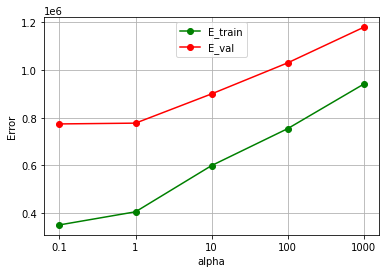

In [32]:
from train_val_chart import chart

chart(train_MAEs, val_MAEs, alphas, 'alpha')

---

In [33]:
# Random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=800, random_state=0, verbose=0)

model = TransformedTargetRegressor(regressor=rf_regressor,
                                 func=np.log, inverse_func=np.exp)

# Full pipeline = preprocess_pipeline + model
full_pipeline = Pipeline(steps = [
    ('preprocessor', preprocess_pipeline),
    ('model', model)
])

In [34]:
# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất

val_MAEs = []
train_MAEs = []
my_n_estimators = [100, 200, 400, 600, 800, 1000, 1500]
best_val_MAE = float('inf'); best_estimator = None;
for estimator in my_n_estimators:
    full_pipeline.set_params(model__regressor__n_estimators=estimator)  # nested pipeline
    full_pipeline.fit(train_X_df, train_y_sr)
    preds_y = full_pipeline.predict(val_X_df)
    val_mae = mean_absolute_error(preds_y, val_y_sr)
    print("MAE =", val_mae)
    val_MAEs.append(val_mae)
    preds_train_y = full_pipeline.predict(train_X_df)
    train_MAEs.append(mean_absolute_error(preds_train_y, train_y_sr))
    
    if best_val_MAE > val_mae:
        best_val_MAE = val_mae
        best_estimator = estimator
'Finish!'

MAE = 697962.2556765627
MAE = 695554.9814056441
MAE = 693861.2915576712
MAE = 695033.2259001777
MAE = 694798.7667132171
MAE = 694596.1129243408
MAE = 694042.9709465638


'Finish!'

In [35]:
best_estimator

400

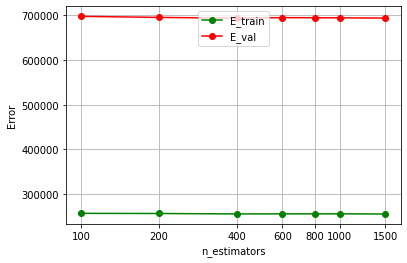

In [36]:
from train_val_chart import chart

chart(train_MAEs, val_MAEs, my_n_estimators, 'n_estimators')


---

### Đánh giá mô hình tìm được

In [37]:
# pick model + best hyperparameters
# Model được chọn là RandomForestRegressor
full_pipeline.set_params(model__regressor__n_estimators=best_estimator)

# fit on total (train+validation)
full_pipeline.fit(temp_X_df, temp_y_sr)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('col_adderdropper', ColAdderDropper()),
                                 ('col_transformer',
                                  ColumnTransformer(transformers=[('nume_col_transformer',
                                                                   SimpleImputer(),
                                                                   ['dien_tich_m2']),
                                                                  ('unorder_cate_col_transformer',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one_hot_encoder',
                                                                                    OneHotEncoder())]),
                                                                   ['City']),
                                                                  ('feat...
                                                                    'Ghế sofa',
                                                                    'bep_an',
                                                                    'Máy '
                                                                    'giặt',
                                                                    'Đồng hồ '
                                                                    'báo thức',
                                                                    'ban_an',
                                                                    'Ổ điện '
                                                                    'gần '
                                                                    'giường',
                                                                    'Giấy vệ '
                                                                    'sinh',
                                                                    'ui_quan_ao',
                                                                    'giuong',
                                                                    'Truyền '
                                                                    'hình vệ '
                                                                    'tinh',
                                                                    'Ban công', ...])])),
                                 ('col_normalizer', StandardScaler())])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(n_estimators=400,
                                                                            random_state=0)))])

In [38]:
pred_test_y = full_pipeline.predict(test_X_df)
print("MAE =", mean_absolute_error(test_y_sr, pred_test_y))

MAE = 446354.9407516476


## Nhìn lại quá trình làm đồ án

### Khó khăn, thuận lợi

Dù đồ án này nhóm em thực hiện còn nhiều thiếu sót, nhưng nhóm cũng đã cố gắng rất nhiều vì gặp phải những khó khăn, hoang mang:

- Dữ liệu cào trực tiếp trên trang [booking.com](https://booking.com/) có quá nhiều thuộc tính, mà toàn chỉ thuộc kiểu binary có/không. Quá trình cào tốn tận 3 ngày  &#128531;

- Vì quá nhiều cột nên việc xử lý bỏ cột, gom cột thủ công tốn rất nhiều thời gian... thậm chí là nghi ngờ tới việc liệu có nên bỏ data này đi kiếm data khác. Tuy nhiên vì cũng chưa build model nên chưa biết data có ổn không, ngoài ra cũng đã lỡ bỏ mấy ngày để cào, nhiều cột 0/1 thì khỏi phải tốn công OneHot &#128540;

- Lúc mới build model thì ra r2_score âm trên train nhưng lại dương trên validation (đến bây giờ thì nhóm vẫn chưa trả lời được thật sự tại sao vậy), lại tiếp tục hoang mang liệu data của mình có phải "garbage". Sau khi bình tĩnh lại thì cũng có một số nơi thảo luận về việc r2_score trên bài toàn regression  thật sự không quan trọng bằng những độ lỗi như SME/ MAE [[1]](https://stackoverflow.com/a/46887354/8487596)... Vì tính "dễ hiểu" nên nhóm chọn metrics là MAE.

Nhóm cũng may mắn là được notebook của thầy Kiên "soi sáng", kết quả model dù không tốt như kỳ vọng nhưng cũng không đến nỗi "garbage in - garbage out"...

### Những điều hữu ích học được

Qua đồ án này thì nhóm cũng đã học được rất nhiều điều hữu ích:

- Vận dụng kiến thức đã học, theo sự hướng dẫn, sự tổ chức notebook, "code cũ", ý tưởng của thầy Kiên để từng bước làm theo, áp dụng lên dữ liệu, giải quyết bài toán từ dữ liệu.

- Cảm nhận rõ ràng với quy trình khoa học dữ liệu, tập làm quen với sự xuất hiện của những khó khăn không lường trước.

## Tham Khảo

Các nguồn tài liệu đã tham khảo:

1. File notebook BT03 của thầy Kiên.

2. Slide môn học và đặc biệt là slide DoAnCK.pdf

3. [Scikit-learn documentation] (https://scikit-learn.org/0.21/documentation.html)

4. [pandas documentation](https://pandas.pydata.org/docs/)

5. https://www.answers.com/Q/When_regression_is_not_applicable

6. https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion/103975
